In [61]:
import paracetamol as para

In [ ]:
import csv

i, k, m, o, p, r, s, u, v = 0, 0, 0, 0, 0, 0, 0, 0, 0
j = 293 -5
l = 318 -5
n = 293 -5
q = 423 -5
t = 383 -5
w = 503 -5

with open('para data.csv', 'w', newline='') as csvfile:
    fieldnames = ['solvent1', 'T1', 'solvent2', 'T2', 'solvent3', 'T3', 'solvent4', 'catalyst4', 'T4', 'solvent5', 'catalyst5', 'T5', 'solvent6', 'catalyst6', 'T6', 'objective']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    
    #thewriter.writerow({'solvent1': i,'T1': j, 'solvent2': k, 'T2': l, 'solvent3': m, 'T3': n, 'solvent4': o, 'catalyst4': p, 'T4': q, 'solvent5': r, 'catalyst5': s, 'T5': t, 'solvent6': u, 'catalyst6': v, 'T6': w, 'objective': para.paracetamol(i, j, k, l, m, n, o, p, q, r, s, t, u, v, w)})
    while i < 3:
        while j <= 298:
            while k < 3:
                while l <= 323:
                    while m < 3:
                        while n <= 298:
                            while o < 3:
                                while p < 3:
                                    while q <= 428: 
                                        while r < 3:
                                            while s < 3:
                                                while t <= 288:
                                                    while u < 3:
                                                        while v < 3:
                                                            while w <= 508:
                                                                thewriter.writerow({'solvent1': i,'T1': j, 'solvent2': k, 'T2': l, 'solvent3': m, 'T3': n, 'solvent4': o, 'catalyst4': p, 'T4': q, 'solvent5': r, 'catalyst5': s, 'T5': t, 'solvent6': u, 'catalyst6': v, 'T6': w, 'objective': para.paracetamol(i, j, k, l, m, n, o, p, q, r, s, t, u, v, w)})
                                                                w += 5
                                                            v += 1
                                                            w = 498
                                                        u += 1
                                                        v = 0
                                                    t += 5
                                                    u = 0
                                                s += 1
                                                t = 278
                                            r += 1
                                            s = 0
                                        q += 5
                                        r = 0
                                    p += 1
                                    q = 418
                                o += 1
                                p = 0
                            n += 5
                            o = 0
                        m += 1
                        n = 288
                    l += 5
                    m = 0
                k += 1
                l = 313
            j += 5
            k = 0
        i += 1
        j = 288
    

# Optimising Step 1 and 2

In [1]:
import step1and2 as step12

### [STEP 1 and 2] Generating data using Grid method

In [3]:
import csv

i, k = 0, 0
j = 293 - 5
l = 318 - 5

with open('step1and2data.csv', 'w', newline='') as csvfile:
    fieldnames = ['solvent1', 'T1', 'solvent2', 'T2', 'objective']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    #thewriter.writerow({'solvent1': i,'T1': j, 'solvent2': k, 'T2': l, 'objective': step12.s12(i, j, k, l)})
    while i < 4:
        while j <= 298:
            while k < 3:
                while l <= 323:
                    thewriter.writerow({'solvent1': i,'T1': j, 'solvent2': k, 'T2': l, 'objective': step12.s12(i, j, k, l)})
                    l += 2
                k += 1
                l = 313
            j += 2
            k = 0
        i += 1
        j = 288

### [STEP 1 and 2] Generating data using Hypercube sampling

In [88]:
from scipy.stats import qmc
import csv

s12_l_bounds = [1, 280, 1, 305]
s12_u_bounds = [5, 305, 5, 330]
sampler = qmc.LatinHypercube(d=4)
#sample = sampler.random(n=5)
#qmc.scale(sample, l_bounds, u_bounds)

s12_sample = sampler.integers(s12_l_bounds, u_bounds=s12_u_bounds, n=10000)
#print(sample)
#qmc.discrepancy(sample)


with open('step1and2data.csv', 'w', newline='') as csvfile:
    fieldnames = ['solvent1', 'T1', 'solvent2', 'T2', 'yield', 'cost', 'environment cost', 'objective']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    for i in s12_sample:
        thewriter.writerow({'solvent1': i[0],'T1': i[1], 'solvent2': i[2], 'T2': i[3], 'yield':step12.s12(i[0], i[1], i[2], i[3])[0], 'cost': step12.s12(i[0], i[1], i[2], i[3])[1], 'environment cost': step12.s12(i[0], i[1], i[2], i[3])[2], 'objective': step12.s12(i[0], i[1], i[2], i[3])[3]})

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

s12_data = pd.read_csv('step1and2data.csv')
s12input = s12_data.drop(['yield', 'cost', 'environment cost', 'objective'], axis=1)
s12output = s12_data.iloc[:, 4:7]

s12x_train, s12x_test, s12y_train, s12y_test = train_test_split(s12input, s12output, test_size=0.2)


### [STEP 1 and 2] Generating model

In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model

s12model = Sequential()
s12model.add(Dense(units=32, activation = 'relu', input_dim = len(s12x_train.columns)))
layers.Dropout(0.2)
s12model.add(Dense(units=32, activation = 'relu'))
layers.Dropout(0.2)
s12model.add(Dense(units=3, activation='linear'))

In [33]:
s12model.compile(loss='mape', optimizer=tf.optimizers.Adam(0.001), metrics='mape')


### [STEP 1 and 2] Training model

In [90]:
s12x_train= np.array(s12x_train)
s12x_test = np.array(s12x_test)
s12y_train = np.array(s12y_train)
s12y_test = np.array(s12y_test)

s12model.fit(s12x_train, s12y_train, epochs=500, batch_size=16)

Epoch 1/500
500/500 [==============================] - 1s 1ms/step - loss: 1.4940 - mape: 1.4940
Epoch 2/500
500/500 [==============================] - 1s 1ms/step - loss: 1.4234 - mape: 1.4234
Epoch 3/500
500/500 [==============================] - 0s 936us/step - loss: 1.4102 - mape: 1.4102
Epoch 4/500
500/500 [==============================] - 0s 950us/step - loss: 1.4336 - mape: 1.4336
Epoch 5/500
500/500 [==============================] - 1s 1ms/step - loss: 1.4901 - mape: 1.4901
Epoch 6/500
500/500 [==============================] - 0s 973us/step - loss: 1.4405 - mape: 1.4405
Epoch 7/500
500/500 [==============================] - 1s 1ms/step - loss: 1.3606 - mape: 1.3606
Epoch 8/500
500/500 [==============================] - 1s 1ms/step - loss: 1.3998 - mape: 1.3998
Epoch 9/500
500/500 [==============================] - 0s 939us/step - loss: 1.5240 - mape: 1.5240
Epoch 10/500
500/500 [==============================] - 1s 1ms/step - loss: 1.3989 - mape: 1.3989
Epoch 11/500
500/500 

### [STEP 1 and 2] Testing model

63/63 [==============================] - 0s 1ms/step
0.0005167328597467201
[[1.0502443  1.1664335  0.9836292 ]
 [1.0076214  0.94538563 0.6639983 ]
 [1.0093124  1.0138035  1.0066966 ]
 [0.9849656  1.024579   0.865911  ]
 [1.0504521  1.6678029  1.6516237 ]]
[[1.05553409 1.16708343 0.95947566]
 [0.99907323 0.93245771 0.62085959]
 [0.99999196 1.01488718 0.99999898]
 [0.97264044 1.00006375 0.81667935]
 [1.05476909 1.67685839 1.66805622]]


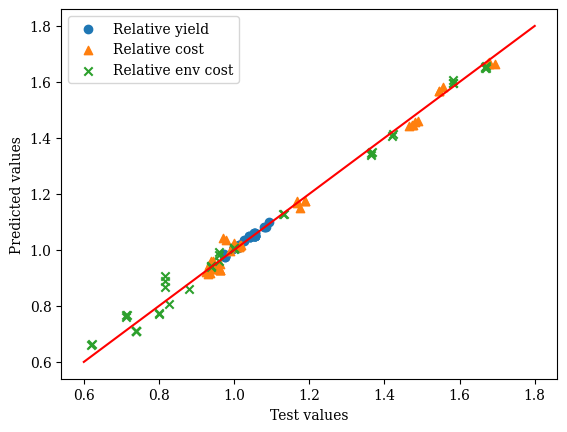

In [105]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

s12y_hat = s12model.predict(s12x_test)
s12mse = mean_squared_error(s12y_hat, s12y_test)
print(s12mse)
print(s12y_hat[:5])
print(s12y_test[:5])


a = [0.6, 1.8]
b = a

plt.scatter(s12y_test[:40,0], s12y_hat[:40,0], marker='o', label='Relative yield')
plt.scatter(s12y_test[:40,1], s12y_hat[:40,1], marker='^', label='Relative cost')
plt.scatter(s12y_test[:40,2], s12y_hat[:40,2], marker='x', label='Relative env cost')

plt.plot(a, a, '-r')
plt.xlabel('Test values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

### [STEP 1 and 2] Saving model

In [92]:
s12model.save('s12model')

INFO:tensorflow:Assets written to: s12model\assets


### [STEP 1 and 2] Using NSGA2 on original

In [74]:
import numpy as np
from tensorflow.keras.models import load_model
from pymoo.problems.functional import FunctionalProblem
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_termination
from pymoo.optimize import minimize

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

xl=[1, 288, 1, 310]
xu=[4, 350, 4, 350]

class s12Problem(Problem):
    
    def _evaluate(self, designs, out, *args, **kwargs):
        
        res=np.array([[1, 2, 3]])
        for design in designs:
            res = np.append(res, [np.array(step12.s12(design[0], design[1], design[2], design[3])[:-1])], axis=0)
        res = np.delete(res, 0, axis=0)
        for i in res:
            i[0] = -i[0]
        #    i[1] = i[1] + i[2]
        #res=np.delete(res, 2, 1)
        #out['F'] = -(2*res[:, 0] + -0.6*res[:, 1] + -0.4*res[:, 2])
        out['F'] = np.array(res)
        out['G'] = res[:, 0]

problem = s12Problem(n_var=4, n_obj=3, n_ieq_constr=1, xl=xl, xu=xu)

method = NSGA2(pop_size=200,
            sampling=IntegerRandomSampling(),
            crossover=SBX(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            mutation=PM(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            )


#algorithm = NSGA2(pop_size=200)

s12results = minimize(
    problem,
    method,
    ('n_gen', 500),
    verbose=True
)

s12results.F
s12results.X


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      199 |     23 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      399 |     31 |  0.000000E+00 |  0.000000E+00 |  0.1156494710 |         ideal
     3 |      599 |     38 |  0.000000E+00 |  0.000000E+00 |  0.0050749544 |         ideal
     4 |      799 |     55 |  0.000000E+00 |  0.000000E+00 |  0.0079118183 |         ideal
     5 |      999 |     82 |  0.000000E+00 |  0.000000E+00 |  0.0046639386 |             f
     6 |     1199 |    115 |  0.000000E+00 |  0.000000E+00 |  0.0072266625 |         ideal
     7 |     1399 |    149 |  0.000000E+00 |  0.000000E+00 |  0.0093709799 |         nadir
     8 |     1599 |    196 |  0.000000E+00 |  0.000000E+00 |  0.0012632669 |             f
     9 |     1799 |    200 |  0.000000E+00 |  0.000000E+00 |  0.0055821055 |         ideal
    10 |     1999 |    200 |  0.000000E+00 |  0.000000E+00 |  0.0007964960 |             f

array([[  2, 350,   3, 350],
       [  2, 288,   3, 310],
       [  4, 350,   4, 310],
       [  4, 350,   4, 350],
       [  4, 350,   3, 310],
       [  2, 350,   4, 350],
       [  4, 350,   3, 350],
       [  2, 327,   4, 327],
       [  2, 347,   4, 321],
       [  4, 350,   4, 329],
       [  4, 350,   4, 328],
       [  4, 350,   4, 330],
       [  4, 350,   4, 331],
       [  4, 350,   4, 327],
       [  4, 350,   4, 332],
       [  4, 350,   4, 333],
       [  4, 350,   4, 334],
       [  2, 289,   3, 310],
       [  4, 350,   4, 335],
       [  4, 350,   3, 342],
       [  2, 350,   3, 345],
       [  4, 350,   4, 336],
       [  2, 290,   3, 310],
       [  2, 350,   4, 332],
       [  4, 350,   4, 337],
       [  2, 291,   3, 310],
       [  4, 350,   4, 338],
       [  4, 350,   4, 339],
       [  2, 348,   4, 331],
       [  2, 292,   3, 310],
       [  4, 350,   4, 340],
       [  2, 293,   3, 310],
       [  4, 350,   4, 341],
       [  4, 350,   4, 342],
       [  2, 2

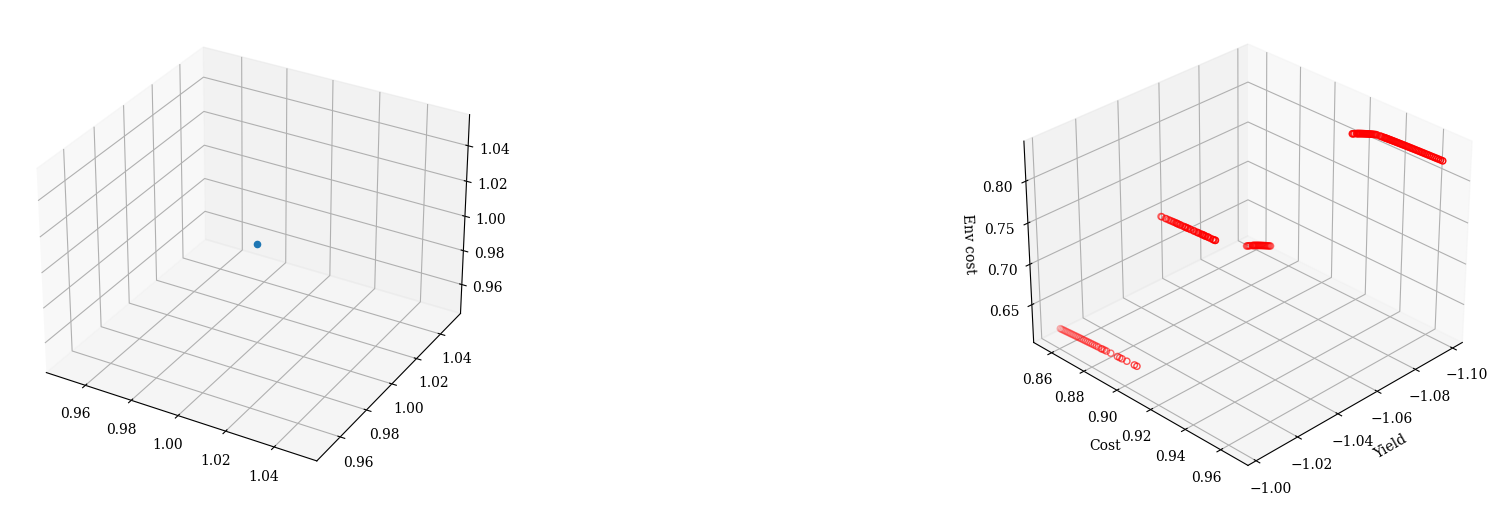

In [182]:
from pymoo.visualization.scatter import Scatter

import matplotlib.pyplot as plt

#print(problem.pareto_front)
#print(s12results.F)
xss = s12results.F[:,0]
yss = s12results.F[:,1]
zss = s12results.F[:,2]

#fig, ax = plt.figure(figsize=(6,6), constrained_layout=True)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 3, 3, projection='3d')

ax.scatter(xss, yss, zss, facecolor="none", edgecolor="red")
ax.view_init(elev=30, azim=45)

ax.set_xlabel('Yield')
ax.set_ylabel('Cost')
ax.set_zlabel('Env cost')
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)


ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(1, 1, 1)
plt.show()

### [STEP 1 and 2] Using NSGA2 on ANN

In [94]:
import numpy as np
from tensorflow.keras.models import load_model
from pymoo.problems.functional import FunctionalProblem
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_termination
from pymoo.optimize import minimize

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

xl=[1, 280, 1, 305]
xu=[4, 305, 4, 330]

s12model = load_model('s12model')

class s12mlProblem(Problem):
    
    def _evaluate(self, designs, out, *args, **kwargs):
        
        res = s12model.predict(designs)
        for i in res:
            i[0] = -i[0]
        #res=np.delete(res, 2, 1)
        #out['F'] = -(2*res[:, 0] + -0.6*res[:, 1] + -0.4*res[:, 2])
        out['F'] = np.array(res)
        out['G'] = res[:, 0]

problem = s12mlProblem(n_var=4, n_obj=3, n_ieq_constr=1, xl=xl, xu=xu)

method = NSGA2(pop_size=200,
            sampling=IntegerRandomSampling(),
            crossover=SBX(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            mutation=PM(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            )


#algorithm = NSGA2(pop_size=200)

s12mlresults = minimize(
    problem,
    method,
    ('n_gen', 400),
    verbose=True
)

s12mlresults.F
s12mlresults.X


7/7 [==============================] - 0s 2ms/step
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      200 |     17 |  0.000000E+00 |  0.000000E+00 |             - |             -
7/7 [==============================] - 0s 800us/step
     2 |      400 |     36 |  0.000000E+00 |  0.000000E+00 |  0.0813885106 |         nadir
7/7 [==============================] - 0s 1ms/step
     3 |      600 |     61 |  0.000000E+00 |  0.000000E+00 |  0.0220182876 |         ideal
7/7 [==============================] - 0s 1ms/step
     4 |      800 |     81 |  0.000000E+00 |  0.000000E+00 |  0.0062195114 |             f
7/7 [==============================] - 0s 1ms/step
     5 |     1000 |    104 |  0.000000E+00 |  0.000000E+00 |  0.0042643147 |         ideal
7/7 [==============================] - 0s 1ms/step
     6 |     1200 |    116 |  0.000000E+00 |  0.000000E+00 |  0.0094898619 |         ideal
7/7 [==============================] - 0s 997us/step
  

array([[  4, 298,   3, 305],
       [  4, 295,   3, 305],
       [  2, 305,   3, 307],
       [  2, 305,   3, 324],
       [  2, 294,   3, 305],
       [  2, 293,   3, 305],
       [  2, 305,   3, 312],
       [  2, 305,   3, 306],
       [  4, 305,   3, 314],
       [  2, 290,   3, 305],
       [  2, 305,   3, 308],
       [  2, 305,   3, 309],
       [  2, 305,   3, 328],
       [  2, 305,   3, 319],
       [  2, 305,   3, 311],
       [  4, 282,   3, 305],
       [  2, 295,   3, 305],
       [  4, 302,   3, 305],
       [  2, 305,   4, 326],
       [  4, 305,   3, 316],
       [  4, 305,   4, 328],
       [  4, 305,   4, 324],
       [  2, 305,   4, 309],
       [  4, 305,   4, 318],
       [  2, 291,   3, 305],
       [  4, 305,   3, 330],
       [  4, 283,   3, 305],
       [  2, 305,   3, 320],
       [  2, 305,   3, 313],
       [  4, 293,   4, 305],
       [  4, 305,   4, 322],
       [  2, 305,   4, 324],
       [  4, 298,   4, 305],
       [  2, 305,   4, 320],
       [  4, 3

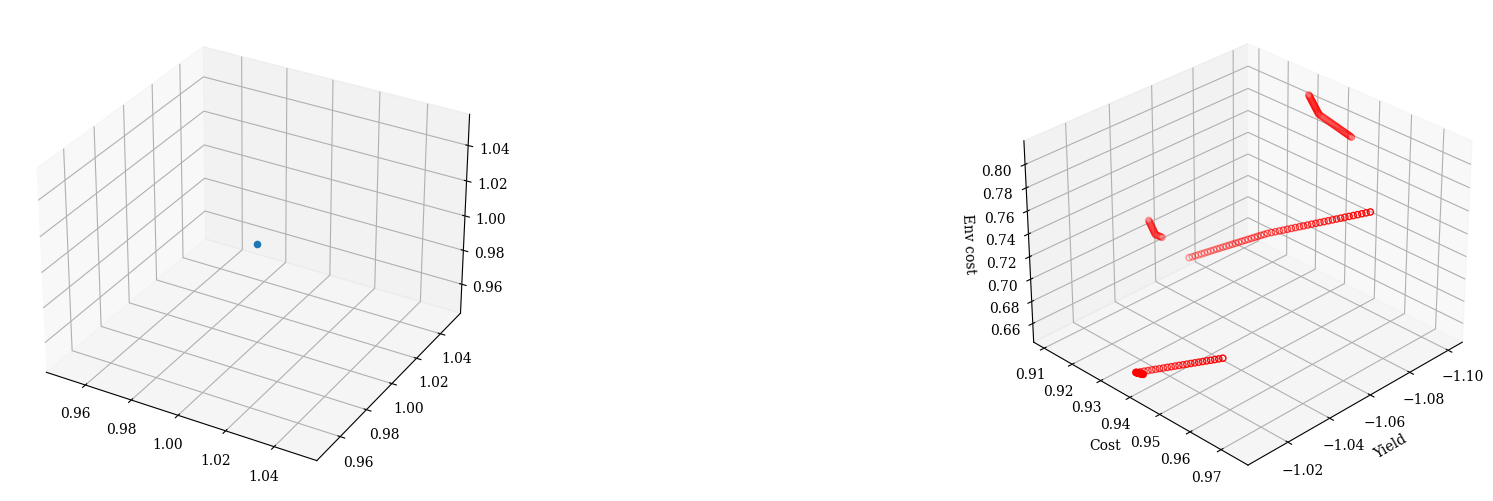

In [191]:
from pymoo.visualization.scatter import Scatter

import matplotlib.pyplot as plt

#print(problem.pareto_front)
#print(s12results.F)
xss = s12mlresults.F[:,0]
yss = s12mlresults.F[:,1]
zss = s12mlresults.F[:,2]

#fig, ax = plt.figure(figsize=(6,6), constrained_layout=True)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 3, 3, projection='3d')

ax.scatter(xss, yss, zss, facecolor="none", edgecolor="red")
ax.view_init(elev=30, azim=45)

ax.set_xlabel('Yield')
ax.set_ylabel('Cost')
ax.set_zlabel('Env cost')
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)


ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(1, 1, 1)
plt.show()

<Figure size 700x300 with 0 Axes>

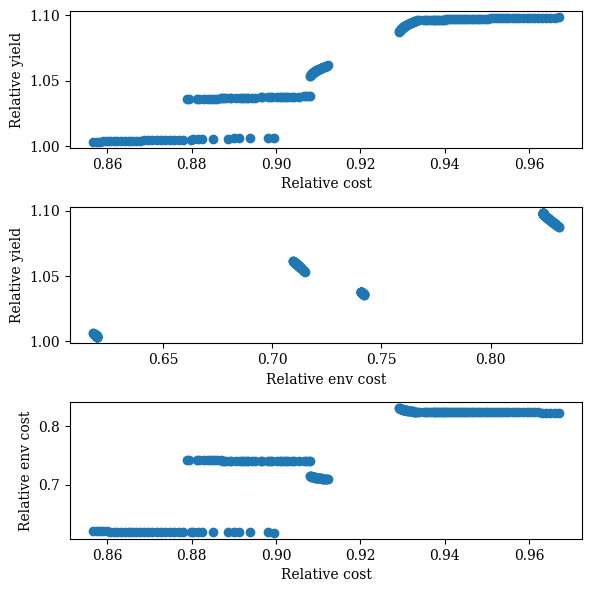

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
figure, axis = plt.subplots(3, 1, figsize=(6,6))

#ax = fig.add_subplot()

xs = s12results.F[:,1]
ys = s12results.F[:,2]
zs = -s12results.F[:,0]

axis[0].scatter(xs, zs)
axis[0].set(xlabel='Relative cost', ylabel='Relative yield')
axis[1].scatter(ys, zs)
axis[1].set(xlabel='Relative env cost', ylabel='Relative yield')
axis[2].scatter(xs, ys)
axis[2].set(xlabel='Relative cost', ylabel='Relative env cost')
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)


plt.show()

<Figure size 1000x1000 with 0 Axes>

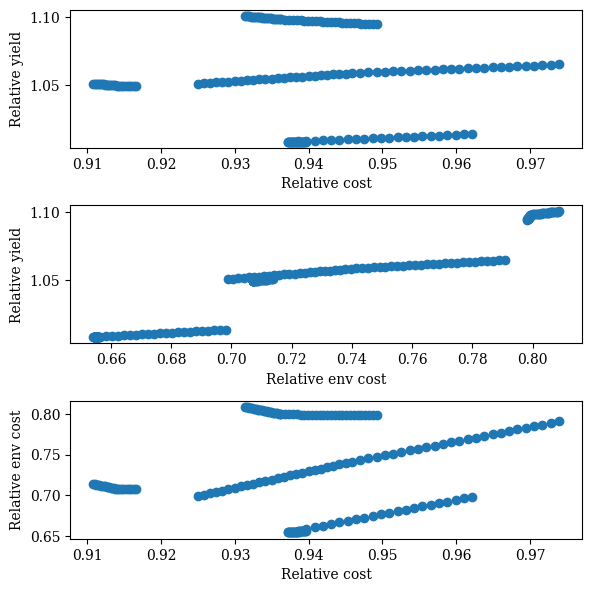

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
figure, axis = plt.subplots(3, 1, figsize=(6,6))

#ax = fig.add_subplot()

xs = s12mlresults.F[:,1]
ys = s12mlresults.F[:,2]
zs = -s12mlresults.F[:,0]

axis[0].scatter(xs, zs)
axis[0].set(xlabel='Relative cost', ylabel='Relative yield')
axis[1].scatter(ys, zs)
axis[1].set(xlabel='Relative env cost', ylabel='Relative yield')
axis[2].scatter(xs, ys)
axis[2].set(xlabel='Relative cost', ylabel='Relative env cost')
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)

plt.show()

# Optimising steps 1 to 6

In [1]:
import paracetamol as para

### [All steps] Generating data using Grid method

In [ ]:
import csv

i, k, m, o, p, r, s, u, v = 0, 0, 0, 0, 0, 0, 0, 0, 0
j = 293 -5
l = 318 -5
n = 293 -5
q = 423 -5
t = 383 -5
w = 503 -5

with open('para data.csv', 'w', newline='') as csvfile:
    fieldnames = ['solvent1', 'T1', 'solvent2', 'T2', 'solvent3', 'T3', 'solvent4', 'catalyst4', 'T4', 'solvent5', 'catalyst5', 'T5', 'solvent6', 'catalyst6', 'T6', 'objective']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    
    #thewriter.writerow({'solvent1': i,'T1': j, 'solvent2': k, 'T2': l, 'solvent3': m, 'T3': n, 'solvent4': o, 'catalyst4': p, 'T4': q, 'solvent5': r, 'catalyst5': s, 'T5': t, 'solvent6': u, 'catalyst6': v, 'T6': w, 'objective': para.paracetamol(i, j, k, l, m, n, o, p, q, r, s, t, u, v, w)})
    while i < 3:
        while j <= 298:
            while k < 3:
                while l <= 323:
                    while m < 3:
                        while n <= 298:
                            while o < 3:
                                while p < 3:
                                    while q <= 428: 
                                        while r < 3:
                                            while s < 3:
                                                while t <= 288:
                                                    while u < 3:
                                                        while v < 3:
                                                            while w <= 508:
                                                                thewriter.writerow({'solvent1': i,'T1': j, 'solvent2': k, 'T2': l, 'solvent3': m, 'T3': n, 'solvent4': o, 'catalyst4': p, 'T4': q, 'solvent5': r, 'catalyst5': s, 'T5': t, 'solvent6': u, 'catalyst6': v, 'T6': w, 'objective': para.paracetamol(i, j, k, l, m, n, o, p, q, r, s, t, u, v, w)})
                                                                w += 5
                                                            v += 1
                                                            w = 498
                                                        u += 1
                                                        v = 0
                                                    t += 5
                                                    u = 0
                                                s += 1
                                                t = 278
                                            r += 1
                                            s = 0
                                        q += 5
                                        r = 0
                                    p += 1
                                    q = 418
                                o += 1
                                p = 0
                            n += 5
                            o = 0
                        m += 1
                        n = 288
                    l += 5
                    m = 0
                k += 1
                l = 313
            j += 5
            k = 0
        i += 1
        j = 288
    

### [All steps] Generating data using hypercube sampling

In [53]:
from scipy.stats import qmc
import csv

l_bounds = [1, 288, 1, 313, 1, 288, 1, 1, 418, 1, 1, 378, 1, 1, 498]
u_bounds = [5, 298, 5, 323, 5, 298, 5, 5, 428, 5, 5, 388, 5, 5, 508]
sampler = qmc.LatinHypercube(d=15)

sample = sampler.integers(l_bounds, u_bounds=u_bounds, n=100000)

with open('para data.csv', 'w', newline='') as csvfile:
    fieldnames = ['solvent1', 'T1', 'solvent2', 'T2', 'solvent3', 'T3', 'solvent4', 'catalyst4', 'T4', 'solvent5', 'catalyst5', 'T5', 'solvent6', 'catalyst6', 'T6', 'yield', 'cost', 'environment cost', 'objective']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    for i in sample:
        thewriter.writerow({'solvent1': i[0],'T1': i[1], 'solvent2': i[2], 'T2': i[3], 'solvent3': i[4], 'T3': i[5], 'solvent4': i[6], 'catalyst4': i[7], 'T4': i[8], 'solvent5': i[9], 'catalyst5': i[10], 'T5': i[11], 'solvent6': i[12], 'catalyst6': i[13], 'T6': i[14], 'yield': para.paracetamol(i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10], i[11], i[12], i[13], i[14])[0], 'cost': para.paracetamol(i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10], i[11], i[12], i[13], i[14])[1], 'environment cost': para.paracetamol(i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10], i[11], i[12], i[13], i[14])[2], 'objective': para.paracetamol(i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10], i[11], i[12], i[13], i[14])[3]})

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

para_data = pd.read_csv('para data.csv')
input_data = para_data.drop(['yield', 'cost', 'environment cost', 'objective'], axis=1)
output_data = para_data.iloc[:, 15:18]

x_train, x_test, y_train, y_test = train_test_split(input_data, output_data[:], test_size=0.2)


### [All steps] Generating ANN model

In [50]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model

model = Sequential()
model.add(Dense(units=32, activation = 'relu', input_dim = len(x_train.columns)))
layers.Dropout(0.2)
model.add(Dense(units=32, activation = 'relu'))
layers.Dropout(0.2)
model.add(Dense(units=3, activation = 'linear'))

In [51]:
model.compile(loss='mape', optimizer=tf.optimizers.Adam(0.0001), metrics='mape')

### [All steps] Training ANN model

In [67]:
x_train= np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model.fit(x_train, y_train, epochs=300, batch_size=8)

Epoch 1/300
10000/10000 [==============================] - 10s 998us/step - loss: 4.2435 - mape: 4.2435
Epoch 2/300
10000/10000 [==============================] - 10s 1ms/step - loss: 4.2429 - mape: 4.2429
Epoch 3/300
10000/10000 [==============================] - 10s 1ms/step - loss: 4.2373 - mape: 4.2373
Epoch 4/300
10000/10000 [==============================] - 10s 1ms/step - loss: 4.2246 - mape: 4.2246
Epoch 5/300
10000/10000 [==============================] - 9s 934us/step - loss: 4.2312 - mape: 4.2312
Epoch 6/300
10000/10000 [==============================] - 10s 984us/step - loss: 4.2244 - mape: 4.2244
Epoch 7/300
10000/10000 [==============================] - 9s 926us/step - loss: 4.2288 - mape: 4.2288
Epoch 8/300
10000/10000 [==============================] - 9s 928us/step - loss: 4.0791 - mape: 4.0791
Epoch 9/300
10000/10000 [==============================] - 9s 931us/step - loss: 3.3456 - mape: 3.3456
Epoch 10/300
10000/10000 [==============================] - 9s 932us/step 

### [All steps] Saving ANN model

In [68]:
model.save('para model')

INFO:tensorflow:Assets written to: para model\assets


### [All steps] Testing ANN model

In [69]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

model = load_model('para model')

y_hat = model.predict(x_test)
mse = mean_squared_error(y_hat, y_test)
print(mse)
print(y_hat)
print(y_test)

625/625 [==============================] - 0s 660us/step
0.0010577277636247158
[[1.0018299  1.3628119  1.2395853 ]
 [1.0818465  1.5622864  1.4602413 ]
 [1.0001609  1.0296737  0.90700907]
 ...
 [1.0786979  1.2466452  1.1365798 ]
 [1.1225016  1.3262422  1.1960161 ]
 [1.0077757  1.0887575  1.0364623 ]]
[[0.99683007 1.35232684 1.2307564 ]
 [1.07720884 1.49473963 1.4404449 ]
 [1.00479258 1.02828634 0.92785358]
 ...
 [1.07931789 1.22942378 1.09290746]
 [1.11768923 1.28000734 1.15846869]
 [1.0056912  1.09221102 1.05218193]]


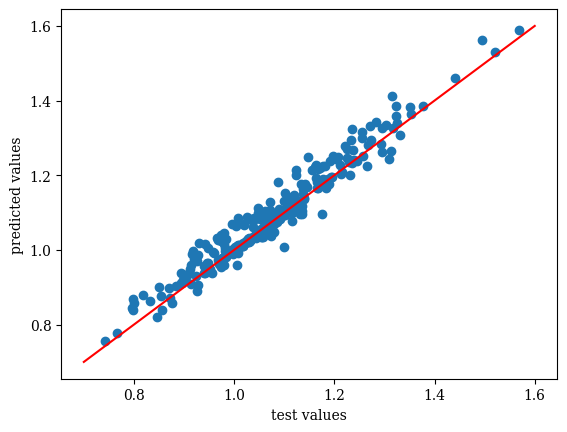

In [70]:
from matplotlib import pyplot as plt

a = [0.7, 1.6]
b = a

plt.scatter(y_test[:100], y_hat[:100])
plt.plot(a, a, '-r')
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.show()

### [All steps] Optimising using NSGA2

In [56]:

import numpy as np
from tensorflow.keras.models import load_model
from pymoo.problems.functional import FunctionalProblem
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_termination
from pymoo.optimize import minimize

model = load_model('para model')

#res = model.predict(x_train)

xl = [1, 288, 1, 313, 1, 288, 1, 1, 418, 1, 1, 378, 1, 1, 498]
xu = [4, 298, 4, 323, 4, 298, 4, 4, 428, 4, 4, 388, 4, 4, 508]

class paraProblem(Problem):
    
    def _evaluate(self, designs, out, *args, **kwargs):
        res=model.predict(designs)
        for i in res:
            i[0] = - i[0]
        
        out['F'] = np.array(res)
        out['G'] = res[:,0]

In [57]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

problem = paraProblem(n_var=15, n_obj=3, n_ieq_constr=1, xl=xl, xu=xu)

#algorithm = NSGA2(pop_size=200)

method = NSGA2(pop_size=200,
            sampling=IntegerRandomSampling(),
            crossover=SBX(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            mutation=PM(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            )

results = minimize(
    problem,
    method,
    ('n_gen', 200),
    verbose=True
)


7/7 [==============================] - 0s 1ms/step
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      200 |      7 |  0.000000E+00 |  0.000000E+00 |             - |             -
7/7 [==============================] - 0s 831us/step
     2 |      400 |     10 |  0.000000E+00 |  0.000000E+00 |  0.0477968649 |         ideal
7/7 [==============================] - 0s 1ms/step
     3 |      600 |     18 |  0.000000E+00 |  0.000000E+00 |  0.2905514156 |         ideal
7/7 [==============================] - 0s 2ms/step
     4 |      800 |     26 |  0.000000E+00 |  0.000000E+00 |  0.0077430158 |         ideal
7/7 [==============================] - 0s 2ms/step
     5 |     1000 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0888823761 |         ideal
7/7 [==============================] - 0s 665us/step
     6 |     1200 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0497787441 |         ideal
7/7 [==============================] - 0s 1ms/step
  

In [55]:
results.F


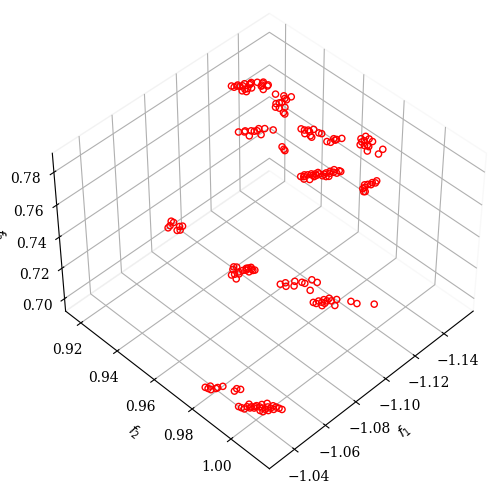

In [58]:
from pymoo.visualization.scatter import Scatter

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(results.F, facecolor="none", edgecolor="red")
plot.show()

<Figure size 1000x1000 with 0 Axes>

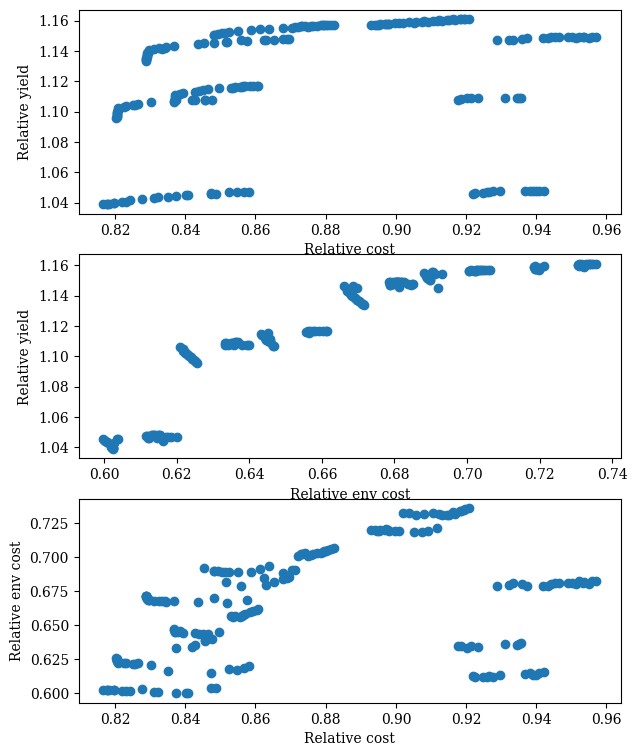

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
figure, axis = plt.subplots(3, 1, figsize=(7,9))

#ax = fig.add_subplot()

xs = results.F[:,1]
ys = results.F[:,2]
zs = -results.F[:,0]

axis[0].scatter(xs, zs)
axis[0].set(xlabel='Relative cost', ylabel='Relative yield')
axis[1].scatter(ys, zs)
axis[1].set(xlabel='Relative env cost', ylabel='Relative yield')
axis[2].scatter(xs, ys)
axis[2].set(xlabel='Relative cost', ylabel='Relative env cost')
plt.show()

In [66]:

#xl = [1, 288, 1, 313, 1, 288, 1, 1, 418, 1, 1, 378, 1, 1, 498]
#xu = [4, 298, 4, 323, 4, 298, 4, 4, 428, 4, 4, 388, 4, 4, 508]

xl = [1, 288, 1, 310, 1, 288, 1, 1, 418, 1, 1, 378, 1, 1, 498]
xu = [4, 330, 4, 340, 4, 330, 4, 4, 430, 4, 4, 400, 4, 4, 540]

#print(model.predict([[2, 298,   3, 313,   4, 296,   4,   2, 428,   4,   1, 378,   4, 1, 502]]))

#para.paracetamol(2, 298,   3, 313,   4, 296,   4,   2, 428,   4,   1, 378,   4, 1, 502)


In [67]:
import numpy as np
from tensorflow.keras.models import load_model
from pymoo.problems.functional import FunctionalProblem
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_termination
from pymoo.optimize import minimize

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

class pProblem(Problem):
    
    def _evaluate(self, designs, out, *args, **kwargs):
        
        res=np.array([[1, 2, 3]])
        for design in designs:
            res = np.append(res, [np.array(para.paracetamol(design[0], design[1], design[2], design[3], design[4], design[5], design[6], design[7], design[8], design[9], design[10], design[11], design[12], design[13], design[14])[:-1])], axis=0)
        res = np.delete(res, 0, axis=0)
        for i in res:
            i[0] = -i[0]
        #    i[1] = i[1] + i[2]
        #res=np.delete(res, 2, 1)
        #out['F'] = -(2*res[:, 0] + -0.6*res[:, 1] + -0.4*res[:, 2])
        out['F'] = np.array(res)
        out['G'] = res[:, 0]

problem = pProblem(n_var=15, n_obj=3, n_ieq_constr=1, xl=xl, xu=xu)

method = NSGA2(pop_size=200,
            sampling=IntegerRandomSampling(),
            crossover=SBX(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            mutation=PM(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
            )


#algorithm = NSGA2(pop_size=200)

results = minimize(
    problem,
    method,
    ('n_gen', 500),
    verbose=True
)

results.F
results.X

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      200 |      6 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      400 |      7 |  0.000000E+00 |  0.000000E+00 |  0.4585865390 |         ideal
     3 |      600 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0671905639 |         ideal
     4 |      800 |      9 |  0.000000E+00 |  0.000000E+00 |  0.2027262771 |         ideal
     5 |     1000 |      8 |  0.000000E+00 |  0.000000E+00 |  0.1143327091 |         ideal
     6 |     1200 |     13 |  0.000000E+00 |  0.000000E+00 |  0.0120891446 |         ideal
     7 |     1400 |     23 |  0.000000E+00 |  0.000000E+00 |  0.0642372554 |         ideal
     8 |     1600 |     41 |  0.000000E+00 |  0.000000E+00 |  0.1273486341 |         ideal
     9 |     1800 |     49 |  0.000000E+00 |  0.000000E+00 |  0.0208484162 |         nadir
    10 |     2000 |     64 |  0.000000E+00 |  0.000000E+00 |  0.0058163753 |         nadir

array([[  4, 330,   4, ...,   3,   3, 540],
       [  2, 288,   3, ...,   3,   3, 540],
       [  2, 288,   3, ...,   3,   1, 498],
       ...,
       [  4, 330,   3, ...,   3,   3, 540],
       [  4, 330,   3, ...,   3,   1, 540],
       [  2, 326,   3, ...,   3,   3, 531]])

In [6]:
results.F
results.X

array([[  4, 350,   4, ...,   3,   3, 550],
       [  2, 288,   3, ...,   4,   2, 498],
       [  3, 350,   4, ...,   2,   3, 550],
       ...,
       [  4, 350,   4, ...,   4,   3, 545],
       [  1, 301,   3, ...,   2,   4, 518],
       [  3, 349,   4, ...,   2,   3, 547]])

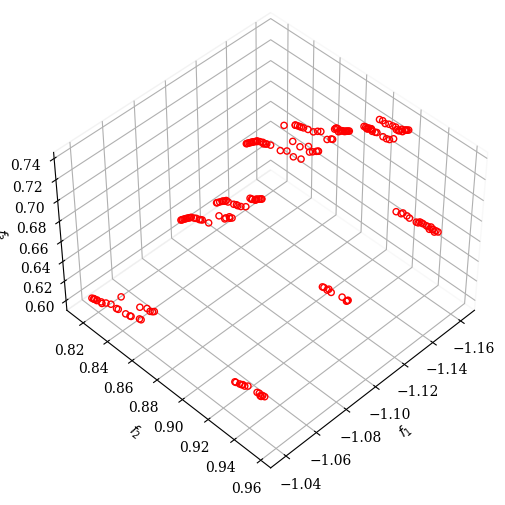

In [68]:
from pymoo.visualization.scatter import Scatter

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(results.F, facecolor="none", edgecolor="red")
plot.show()

<Figure size 1000x1000 with 0 Axes>

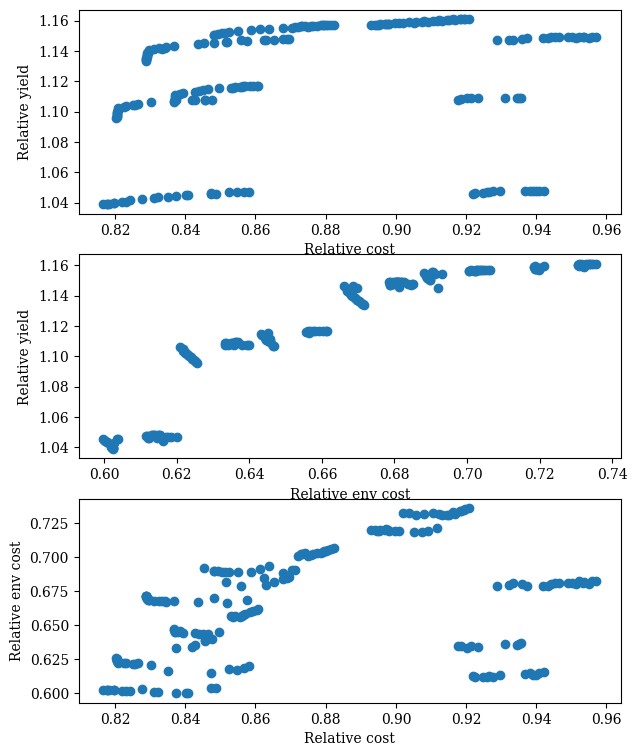

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
figure, axis = plt.subplots(3, 1, figsize=(7,9))

#ax = fig.add_subplot()

xs = results.F[:,1]
ys = results.F[:,2]
zs = -results.F[:,0]

axis[0].scatter(xs, zs)
axis[0].set(xlabel='Relative cost', ylabel='Relative yield')
axis[1].scatter(ys, zs)
axis[1].set(xlabel='Relative env cost', ylabel='Relative yield')
axis[2].scatter(xs, ys)
axis[2].set(xlabel='Relative cost', ylabel='Relative env cost')
plt.show()

NSGA2
sensitivity analysis

In [1]:
import paracetamol as para

AttributeError: 'Figure' object has no attribute 'get_gridspec'

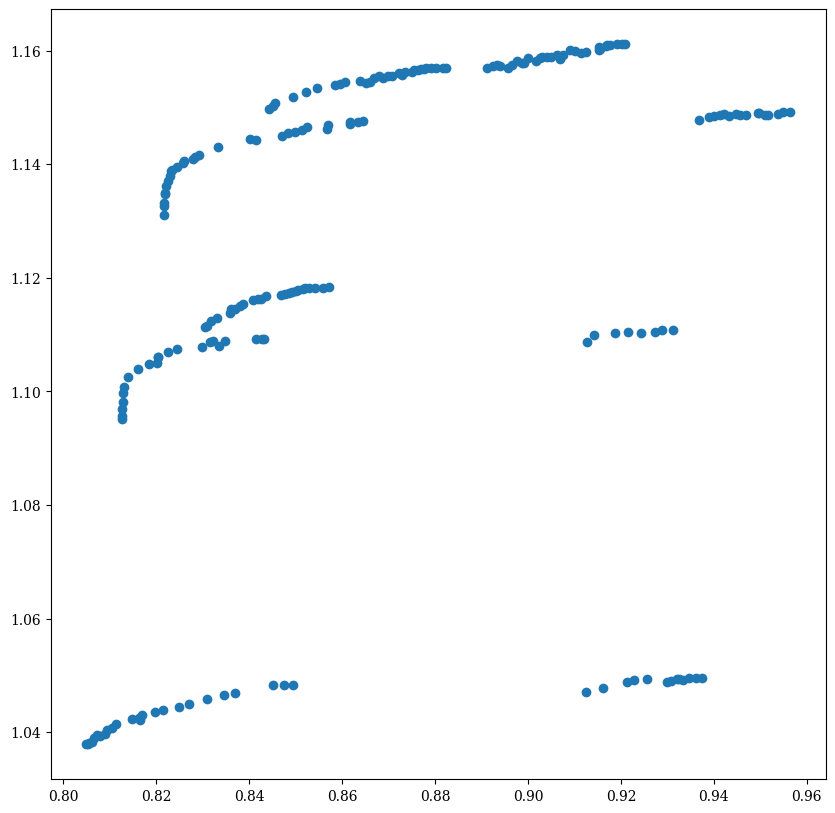

In [30]:
fig = plt.figure(figsize=(10,10))
plt.scatter(xs, zs)
figure.add_subfigure(fig)
plt.scatter(ys, zs)
plt.show()